# Bivariate Regression performance on California Population Dataset
<em> By :- Shivani Balyan  </em> 

##### We have the California.csv data set, which consists of some census information for 858 towns and cities in California. Our task will be to investigate handling of outliers and high leverage points as and transform both the predictor and the response. We are also interested in approximating the relationship, if any, between the percentage of townspeople who are senior citizens and the total population of the town. ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data from the csv file

In [2]:
df = pd.read_csv("California.csv")

#### Information about data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   place              848 non-null    object 
 1   population         848 non-null    int32  
 2   pct_under_18       848 non-null    float64
 3   pct_between_18_64  848 non-null    float64
 4   pct_over_64        848 non-null    float64
 5   male_female_ratio  848 non-null    float64
dtypes: float64(4), int32(1), object(1)
memory usage: 36.6+ KB


Now, Return the first n rows for the object based on position.

In [3]:
df.head()

,place,population,pct_under_18,pct_between_18_64,pct_over_64,male_female_ratio
0,Los Angeles city,3485398,24.8,65.3,10.0,99.6
1,San Diego city,1110549,23.1,66.7,10.2,103.7
2,San Jose city,782248,26.7,66.1,7.2,102.8
3,San Francisco city,723959,16.1,69.3,14.6,99.4
4,Long Beach city,429433,25.5,63.7,10.8,101.0


tail, return the last n rows .

In [4]:
df.tail()

,place,population,pct_under_18,pct_between_18_64,pct_over_64,male_female_ratio
843,South Lake CDP,1059,15.3,44.8,39.9,90.9
844,Monte Rio CDP,1058,22.7,65.2,12.1,111.4
845,Covelo CDP,1057,30.3,54.7,15.0,89.9
846,Irwindale city,1050,34.5,57.8,7.7,93.8
847,Tulelake city,1010,33.4,51.6,15.0,92.3


### Let's have a lookup to our data elements

In [5]:
df.describe()

,population,pct_under_18,pct_between_18_64,pct_over_64,male_female_ratio
count,8.480000e+02,848.00000,848.000000,848.000000,848.000000
mean,3.164433e+04,26.93691,60.683726,12.381132,97.929009
std,1.360409e+05,6.58183,6.400300,7.351481,22.481929
min,1.010000e+03,0.20000,32.800000,1.700000,70.800000
25%,3.224500e+03,22.97500,56.700000,7.700000,90.600000
50%,8.346500e+03,27.00000,60.500000,11.000000,95.500000
75%,2.935150e+04,31.40000,64.700000,14.600000,100.400000
max,3.485398e+06,43.30000,91.500000,62.900000,593.400000


### Let's see null values

In [25]:
df.isnull()

,place,population,pct_under_18,pct_between_18_64,pct_over_64,male_female_ratio
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
843,False,False,False,False,False,False
844,False,False,False,False,False,False
845,False,False,False,False,False,False
846,False,False,False,False,False,False


### returns the number of missing values in the dataset

In [26]:
df.isnull().sum()

place                0
population           0
pct_under_18         0
pct_between_18_64    0
pct_over_64          0
male_female_ratio    0
dtype: int64

 Now , let's see the data types of these elements

In [6]:
df.dtypes

place                 object
population             int64
pct_under_18         float64
pct_between_18_64    float64
pct_over_64          float64
male_female_ratio    float64
dtype: object

### Here in the data, population columns is in string format, so let us convert it into numeric(int) for easy operations

In [7]:
# population convert string to int
df['population']=df['population'].astype(int)

In [8]:
df.dtypes

place                 object
population             int32
pct_under_18         float64
pct_between_18_64    float64
pct_over_64          float64
male_female_ratio    float64
dtype: object

Now let us see all the correlations between all the variables 

In [9]:
# corr() is used to find the pirwise correlation of all columns in the dataframe.
df.corr()

,population,pct_under_18,pct_between_18_64,pct_over_64,male_female_ratio
population,1.000000,-0.033270,0.104318,-0.060598,-0.002159
pct_under_18,-0.033270,1.000000,-0.358603,-0.583055,0.021100
pct_between_18_64,0.104318,-0.358603,1.000000,-0.549288,0.278884
pct_over_64,-0.060598,-0.583055,-0.549288,1.000000,-0.261881
male_female_ratio,-0.002159,0.021100,0.278884,-0.261881,1.000000


### One must notice that there is not any <em> Linear relation </em> between our variables of interest , 'pct_over_64' & 'population'

In [10]:
x=df['pct_over_64']
y=df['population']

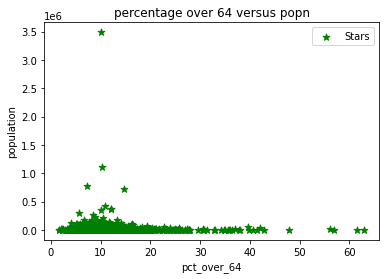

In [11]:
plt.scatter(x,y,label='Stars',color='green',marker='*',s=50)
plt.xlabel('pct_over_64')
plt.ylabel('population')
plt.title('percentage over 64 versus popn') 
plt.legend()
plt.show()

Here it is clearly visible that most of the big cities have about 5%-15% of peoples above 64 . So , we can yes this graph is informative and helpful in finding a small relation.

From this plot we can also conclude that four cities have bulk population than others , cities are as Los Angeles city ,San Diego city, San Jose city and San Francisco city.

# Regression on log of population and percent over 64 variable

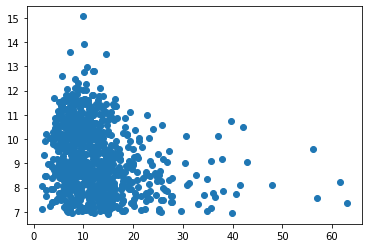

In [12]:
import math
import seaborn as sns
from scipy.stats import norm
plt.scatter(df['pct_over_64'], np.log(df['population']))

# Normal probability plot of remaining variables

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

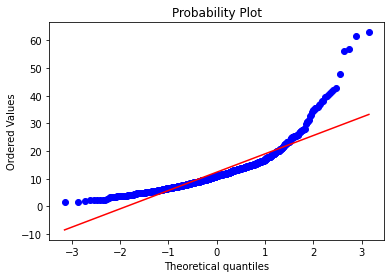

In [13]:
from scipy import stats
import scipy as scipy
stats.probplot(df['pct_over_64'],plot=plt)
plt.figure

### his plot is saying that max peoples above age 64 belong to 5%-15% or we can also say it is also right skewed

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

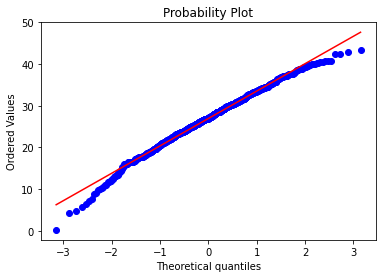

In [14]:
stats.probplot(df['pct_under_18'],plot=plt)
plt.figure

***From this plot we can say that percentage of age under 18 is linear , that means max cities have same percetage distribution among them of under age 18 peoples***

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

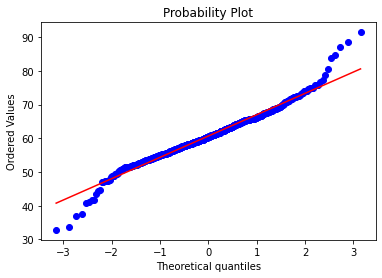

In [15]:
stats.probplot(df['pct_between_18_64'],plot=plt)
plt.figure

*** From this plot it is clear that the population of this category of peoples are skewed on both side ***

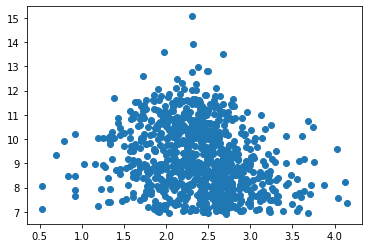

In [16]:
plt.scatter(np.log(df['pct_over_64']), np.log(df['population']))

## Outliers using boxplot

C:\Users\Shivani Balyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pct_over_64'>

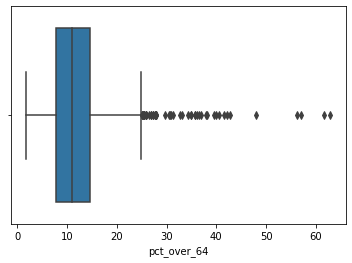

In [23]:
sns.boxplot(df['pct_over_64'])

C:\Users\Shivani Balyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pct_between_18_64'>

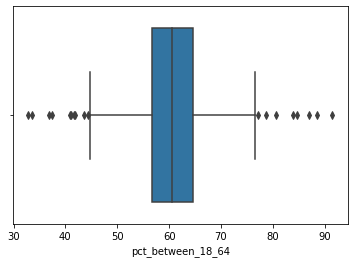

In [20]:
sns.boxplot(df['pct_between_18_64'])

C:\Users\Shivani Balyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pct_under_18'>

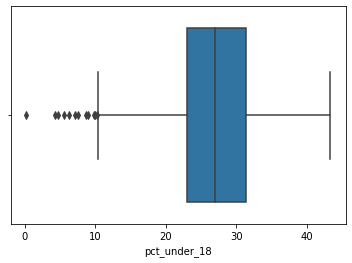

In [21]:
sns.boxplot(df['pct_under_18'])

##### Isn't this amazing ? As you can see how easily ln has changed our perception over residual vs fit plot . Now the plot is easy to read and make conclusions.

#  Final Conclusions ::

## Maximun cities have around 5%-15% people of above age 64 , but in small cities population of peoples above age 64 is higher. 
